In [10]:
### Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules for collaborative filtering
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from collections import defaultdict
from collections import Counter

## Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [11]:
# Load the dataset
df=pd.read_csv('/kaggle/input/myanimelist-dataset/users-score-2023.csv', usecols=["user_id","anime_id","rating"])
print("Shape of the Dataset:",df.shape)
df.head()

Shape of the Dataset: (24325191, 3)


,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


In [12]:
# Checking if there are any duplicate rows
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [user_id, anime_id, rating]
Index: []


In [13]:
# Calculating the average score
avg_score = np.mean(df['rating'])
print('Average Score:', avg_score)

Average Score: 7.622930072779285


In [14]:
# Scaling our "rating" column
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'score' column between 0 and 1
df['scaled_score'] = scaler.fit_transform(df[['rating']])

In [15]:
# Encoding categorical data

## Encoding user IDs
user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
df["anime_encoded"] = anime_encoder.fit_transform(df["anime_id"])
num_animes = len(anime_encoder.classes_)

# Printing dataset information
print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df['rating']), max(df['rating'])))

Number of unique users: 270033, Number of unique anime: 16500
Minimum rating: 1, Maximum rating: 10


In [16]:
# Shuffle the dataset
df = shuffle(df, random_state=100)

# Create feature matrix X and target variable y
X = df[['user_encoded', 'anime_encoded']].values
y = df["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24325191, 2)
Shape of y: (24325191,)


In [17]:
test_set_size = 10000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))

Number of samples in the training set: 24315191
Number of samples in the test set: 10000


In [18]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [19]:
# Setting TPU_INIT flag
USE_TPU = True

# Checking if TPU is initialized
if USE_TPU:
    # If tpu is connected then start creating TPUStrategy
    tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu_resolver)
else:
    !nvidia-smi
    
# Print the TensorFlow version
tf_version = tf.__version__
print(f"TensorFlow version: {tf_version}")

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


TensorFlow version: 2.12.0


In [20]:
def RecommenderNet(num_users, num_animes, embedding_size=128):
    # User input layer and embedding layer
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size)(user)
    
    # Anime input layer and embedding layer
    anime = Input(name='anime_encoded', shape=[1])
    anime_embedding = Embedding(name='anime_embedding', input_dim=num_animes, output_dim=embedding_size)(anime)
    
    # Dot product of user and anime embeddings
    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)
    
    # Dense layers for prediction
    dense = Dense(64, activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)
    
    # Create and compile the model
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["mae", "mse"])
    
    return model
# Checking if TPU is initialized and create the model accordingly
if USE_TPU:
    with tpu_strategy.scope():
        model = RecommenderNet(num_users, num_animes)
else:
    model = RecommenderNet(num_users, num_animes)

# Printing my model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_encoded (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 anime_encoded (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       34564224    ['user_encoded[0][0]']           
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2112000     ['anime_encoded[0][0]']          
                                                                                              

In [21]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

# Adjust the maximum learning rate and batch size if using TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = '/kaggle/working/myanimeweights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]

In [22]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20


2023-12-02 18:45:41.846855: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-12-02 18:45:41.982188: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


304/304 [==============================] - ETA: 0s - loss: 0.6909 - mae: 0.2616 - mse: 0.0886

2023-12-02 18:46:00.052723: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-12-02 18:46:00.172064: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


304/304 [==============================] - 22s 42ms/step - loss: 0.6909 - mae: 0.2616 - mse: 0.0886 - val_loss: 0.6886 - val_mae: 0.2590 - val_mse: 0.0871 - lr: 1.0000e-05
Epoch 2/20
304/304 [==============================] - 7s 21ms/step - loss: 0.6641 - mae: 0.2365 - mse: 0.0752 - val_loss: 0.6378 - val_mae: 0.2111 - val_mse: 0.0618 - lr: 8.8000e-05
Epoch 3/20
304/304 [==============================] - 7s 21ms/step - loss: 0.6029 - mae: 0.1747 - mse: 0.0456 - val_loss: 0.5816 - val_mae: 0.1513 - val_mse: 0.0354 - lr: 1.6600e-04
Epoch 4/20
304/304 [==============================] - 6s 21ms/step - loss: 0.5781 - mae: 0.1479 - mse: 0.0344 - val_loss: 0.5769 - val_mae: 0.1458 - val_mse: 0.0335 - lr: 2.4400e-04
Epoch 5/20
304/304 [==============================] - 6s 21ms/step - loss: 0.5772 - mae: 0.1462 - mse: 0.0340 - val_loss: 0.5767 - val_mae: 0.1455 - val_mse: 0.0334 - lr: 3.2200e-04
Epoch 6/20
304/304 [==============================] - 6s 21ms/step - loss: 0.5543 - mae: 0.1220 - ms

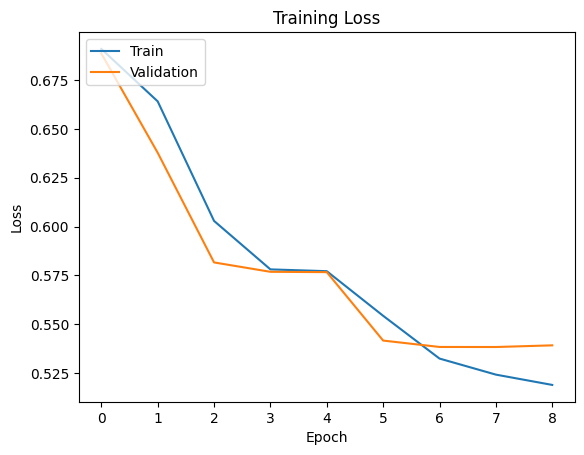

In [23]:
# Training results visualization

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [24]:
def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = model.get_layer(name)
    
    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    
    return weights

# Extract weights for anime embeddings
anime_weights = extract_weights('anime_embedding', model)
# Extract weights for user embeddings
user_weights = extract_weights('user_embedding', model)

#### Reading the whole dataset

In [25]:
df_anime=pd.read_csv('/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv')

#### Now I want my model to recommend only those animes that have been rated by at least a certain number of users, which I will set as the threshold. This threshold helps ensure that the recommended anime titles have received a sufficient number of ratings, indicating a certain level of popularity or user engagement.

In [26]:
popularity_threshold = 50
df_anime= df_anime.query('Members >= @popularity_threshold')
print(df_anime.shape)
df_anime.head(3)      # only give rating of those movies for which atleast 200 user have rated

(22879, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


# 1: Item Based Recommendation

In [27]:
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        anime_row = df_anime[df_anime['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]
        weights = anime_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1            
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('Animes closest to {}'.format(name))
        if return_dist:
            return dists, closest
        
        SimilarityArr = []
        
        for close in closest:
            decoded_id = anime_encoder.inverse_transform([close])[0]
            anime_frame = df_anime[df_anime['anime_id'] == decoded_id]
            
            anime_name = anime_frame['Name'].values[0]
            english_name = anime_frame['English name'].values[0]
            name = english_name if english_name != "UNKNOWN" else anime_name
            genre = anime_frame['Genres'].values[0]
            Synopsis = anime_frame['Synopsis'].values[0]
            similarity = dists[close]
            similarity = "{:.2f}%".format(similarity * 100)
            SimilarityArr.append({"Name": name, "Similarity": similarity, "Genres": genre, "Synopsis":Synopsis})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame[Frame.Name != name]
    except:
        print('{} not found in Anime list'.format(name))

pd.set_option('display.max_colwidth', None)

In [28]:
find_similar_animes('Tensei shitara Slime Datta Ken', n=5, neg=False)  # That Time I Got Reincarnated as a Slime

Animes closest to Tensei shitara Slime Datta Ken


,Name,Similarity,Genres,Synopsis
4,That Time I Got Reincarnated as a Slime Season 2,85.76%,"Action, Adventure, Comedy, Fantasy","Taking a break from his time as a teacher, the powerful slime Rimuru Tempest returns to his kingdom, eponymously named Tempest, just in time to begin negotiations with a nearby nation—the Kingdom of Eurazania. While the negotiations are anything but peaceful, they do end successfully, allowing Rimuru to return and finish teaching. When trying to again return to Tempest, this time permanently, Rimuru is stopped by a mysterious figure who is somehow able to constrain the many magical abilities he has at his disposal. \n\nIn Tempest, the situation is even worse. A group of unknown humans has invaded the land and are assaulting its citizens, both influential and innocent. They are not just trying to bring harm either—they have the intent to kill. Can Rimuru overcome his powerful and dangerous foe and return to Tempest before it is too late?"
3,That Time I Got Reincarnated as a Slime Season 2 Part 2,77.59%,"Action, Adventure, Comedy, Fantasy","The nation of Tempest is in a festive mood after successfully overcoming the surprise attack from the Falmuth Army and the Western Holy Church. Beyond the festivities lies a meeting between Tempest and its allies to decide the future of the Nation of Monsters. The aftermath of the Falmuth invasion, Milim Nava's suspicious behavior, and the disappearance of Demon Lord Carrion—the problems seem to keep on piling up.\n\nRimuru Tempest, now awakened as a ""True Demon Lord,"" decides to go on the offensive against Clayman. With the fully revived ""Storm Dragon"" Veldora, ""Ultimate Skill"" Raphael, and other powerful comrades, the ruler of the Tempest is confident in taking down his enemies one by one until he can face the man pulling the strings."
2,The Rising of the Shield Hero,70.67%,"Action, Adventure, Drama, Fantasy","The Four Cardinal Heroes are a group of ordinary men from modern-day Japan summoned to the kingdom of Melromarc to become its saviors. Melromarc is a country plagued by the Waves of Catastrophe that have repeatedly ravaged the land and brought disaster to its citizens for centuries. The four heroes are respectively bestowed a sword, spear, bow, and shield to vanquish these Waves. Naofumi Iwatani, an otaku, becomes cursed with the fate of being the ""Shield Hero."" Armed with only a measly shield, Naofumi is belittled and ridiculed by his fellow heroes and the kingdom's people due to his weak offensive capabilities and lackluster personality.\n\nWhen the heroes are provided with resources and comrades to train with, Naofumi sets out with the only person willing to train alongside him, Malty Melromarc. He is soon betrayed by her, however, and becomes falsely accused of taking advantage of her. Naofumi then becomes heavily discriminated against and hated by the people of Melromarc for something he didn't do. With a raging storm of hurt and mistrust in his heart, Naofumi begins his journey of strengthening himself and his reputation. Further along however, the difficulty of being on his own sets in, so Naofumi buys a demi-human slave on the verge of death named Raphtalia to accompany him on his travels.\n\nAs the Waves approach the kingdom, Naofumi and Raphtalia must fight for the survival of the kingdom and protect the people of Melromarc from their ill-fated future."
1,Dr. Stone,64.31%,"Adventure, Comedy, Sci-Fi","After five years of harboring unspoken feelings, high-schooler Taiju Ooki is finally ready to confess his love to Yuzuriha Ogawa. Just when Taiju begins his confession however, a blinding green light strikes the Earth and petrifies mankind around the world—turning every single human into stone.\n\nSeveral millennia later, Taiju awakens to find the modern world completely nonexistent, as nature has flourished in the years humanity stood still. Among a stone world of statues, Taiju encounters one other living human: his science-loving friend Senk

In [29]:
find_similar_animes('Shigatsu wa Kimi no Uso', n=5, neg=False) # Your Lie in April

Animes closest to Shigatsu wa Kimi no Uso


,Name,Similarity,Genres,Synopsis
4,Your Name.,82.06%,"Award Winning, Drama, Supernatural","Mitsuha Miyamizu, a high school girl, yearns to live the life of a boy in the bustling city of Tokyo—a dream that stands in stark contrast to her present life in the countryside. Meanwhile in the city, Taki Tachibana lives a busy life as a high school student while juggling his part-time job and hopes for a future in architecture.\n\nOne day, Mitsuha awakens in a room that is not her own and suddenly finds herself living the dream life in Tokyo—but in Taki's body! Elsewhere, Taki finds himself living Mitsuha's life in the humble countryside. In pursuit of an answer to this strange phenomenon, they begin to search for one another.\n\nKimi no Na wa. revolves around Mitsuha and Taki's actions, which begin to have a dramatic impact on each other's lives, weaving them into a fabric held together by fate and circumstance."
3,A Silent Voice,81.93%,"Award Winning, Drama","As a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye.\n\nNow in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends.\n\nKoe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
2,Steins;Gate: The Movie - Load Region of Déjà Vu,78.22%,"Drama, Sci-Fi","After a year in America, Kurisu Makise returns to Akihabara and reunites with Rintarou Okabe. However, their reunion is cut short when Okabe begins to experience recurring flashes of other timelines as the consequences of his time traveling start to manifest. These side effects eventually culminate in Okabe suddenly vanishing from the world, and only the startled Kurisu has any memory of his existence.\n\nIn the midst of despair, Kurisu is faced with a truly arduous choice that will test both her duty as a scientist and her loyalty as a friend: follow Okabe's advice and stay away from traveling through time to avoid the potential consequences it may have on the world lines, or ignore it to rescue the person that she cherishes most. Regardless of her decision, the path she chooses is one that will affect the past, the present, and the future."
1,ERASED,76.85%,"Mystery, Supernatural, Suspense","When tragedy is about to strike, Satoru Fujinuma finds himself sent back several minutes before the accident occurs. The detached, 29-year-old manga artist has taken advantage of this powerful yet mysterious phenomenon, which he calls ""Revival,"" to save many lives.\n \nHowever, when he is wrongfully accused of murdering someone close to him, Satoru is sent back to the past once again, but this time to 1988, 18 years in the past. Soon, he realizes that the murder may be connected to the abduction and killing of one of his classmates, the solitary and mysterious Kayo Hinazuki, that took place when he was a child. This is his chance to make things right.\n \nBoku dake ga Inai Machi follows Satoru in his mission to uncover what truly transpired 18 years ago and prevent the death of his classmate while protecting those he cares about in the present."
0,Anohana: The Flower We Saw That Day,75.84%,"Drama, Supernatural","Jinta Yadomi is peacefully living as a recluse, spending his days away from school and playing video games at home instead. One hot summer day, his childhood friend, Meiko ""Menma"" Honma, ap

In [30]:
find_similar_animes('One Punch Man', n=5, neg=False)

Animes closest to One Punch Man


,Name,Similarity,Genres,Synopsis
4,Made in Abyss,73.57%,"Adventure, Drama, Fantasy, Mystery, Sci-Fi","The Abyss—a gaping chasm stretching down into the depths of the earth, filled with mysterious creatures and relics from a time long past. How did it come to be? What lies at the bottom? Countless brave individuals, known as Divers, have sought to solve these mysteries of the Abyss, fearlessly descending into its darkest realms. The best and bravest of the Divers, the White Whistles, are hailed as legends by those who remain on the surface.\n\nRiko, daughter of the missing White Whistle Lyza the Annihilator, aspires to become like her mother and explore the furthest reaches of the Abyss. However, just a novice Red Whistle herself, she is only permitted to roam its most upper layer. Even so, Riko has a chance encounter with a mysterious robot with the appearance of an ordinary young boy. She comes to name him Reg, and he has no recollection of the events preceding his discovery. Certain that the technology to create Reg must come from deep within the Abyss, the two decide to venture forth into the chasm to recover his memories and see the bottom of the great pit with their own eyes. However, they know not of the harsh reality that is the true existence of the Abyss."
3,Your Name.,73.14%,"Award Winning, Drama, Supernatural","Mitsuha Miyamizu, a high school girl, yearns to live the life of a boy in the bustling city of Tokyo—a dream that stands in stark contrast to her present life in the countryside. Meanwhile in the city, Taki Tachibana lives a busy life as a high school student while juggling his part-time job and hopes for a future in architecture.\n\nOne day, Mitsuha awakens in a room that is not her own and suddenly finds herself living the dream life in Tokyo—but in Taki's body! Elsewhere, Taki finds himself living Mitsuha's life in the humble countryside. In pursuit of an answer to this strange phenomenon, they begin to search for one another.\n\nKimi no Na wa. revolves around Mitsuha and Taki's actions, which begin to have a dramatic impact on each other's lives, weaving them into a fabric held together by fate and circumstance."
2,My Hero Academia Season 2,72.86%,Action,"At UA Academy, not even a violent attack can disrupt their most prestigious event: the school sports festival. Renowned across Japan, this festival is an opportunity for aspiring heroes to showcase their abilities, both to the public and potential recruiters.\n\nHowever, the path to glory is never easy, especially for Izuku Midoriya—whose quirk possesses great raw power but is also cripplingly inefficient. Pitted against his talented classmates, such as the fire and ice wielding Shouto Todoroki, Izuku must utilize his sharp wits and master his surroundings to achieve victory and prove to the world his worth."
1,Demon Slayer: Kimetsu no Yaiba Entertainment District Arc,72.64%,"Action, Fantasy","The devastation of the Mugen Train incident still weighs heavily on the members of the Demon Slayer Corps. Despite being given time to recover, life must go on, as the wicked never sleep: a vicious demon is terrorizing the alluring women of the Yoshiwara Entertainment District. The Sound Pillar, Tengen Uzui, and his three wives are on the case. However, when he soon loses contact with his spouses, Tengen fears the worst and enlists the help of Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira to infiltrate the district's most prominent houses and locate the depraved Upper Rank demon."
0,My Hero Academia,72.56%,Action,"The appearance of ""quirks,"" newly discovered super powers, has been steadily increasing over the years, with 80 percent of humanity possessing various abilities from manipulation of elements to shapeshifting. This leaves the remainder of the world completely powerless, and Izuku Midoriya is one such individual.\n\nSince he was a child, the ambitious middle schooler has wanted nothing more than to be a hero. Izuku's unfair fate leaves him admi

In [31]:
find_similar_animes('Mushoku Tensei: Isekai Ittara Honki Dasu', n=5, neg=False)

Animes closest to Mushoku Tensei: Isekai Ittara Honki Dasu


,Name,Similarity,Genres,Synopsis
4,Mushoku Tensei: Jobless Reincarnation Part 2,89.01%,"Drama, Fantasy, Ecchi","After the mysterious mana calamity, Rudeus Greyrat and his fierce student Eris Boreas Greyrat are teleported to the Demon Continent. There, they team up with their newfound companion Ruijerd Supardia—the former leader of the Superd's Warrior group—to form ""Dead End,"" a successful adventurer party. Making a name for themselves, the trio journeys across the continent to make their way back home to Fittoa.\n\nFollowing the advice he received from the faceless god Hitogami, Rudeus saves Kishirika Kishirisu, the Great Emperor of the Demon World, who rewards him by granting him a strange power. Now, as Rudeus masters the powerful ability that offers a number of new opportunities, it might prove to be more than what he bargained for when unexpected dangers threaten to hinder their travels."
3,Demon Slayer: Kimetsu no Yaiba Entertainment District Arc,61.26%,"Action, Fantasy","The devastation of the Mugen Train incident still weighs heavily on the members of the Demon Slayer Corps. Despite being given time to recover, life must go on, as the wicked never sleep: a vicious demon is terrorizing the alluring women of the Yoshiwara Entertainment District. The Sound Pillar, Tengen Uzui, and his three wives are on the case. However, when he soon loses contact with his spouses, Tengen fears the worst and enlists the help of Tanjirou Kamado, Zenitsu Agatsuma, and Inosuke Hashibira to infiltrate the district's most prominent houses and locate the depraved Upper Rank demon."
2,[Oshi No Ko],59.84%,"Drama, Supernatural","In the entertainment world, celebrities often show exaggerated versions of themselves to the public, concealing their true thoughts and struggles beneath elaborate lies. Fans buy into these fabrications, showering their idols with undying love and support, until something breaks the illusion. Sixteen-year-old rising star Ai Hoshino of pop idol group B Komachi has the world captivated; however, when she announces a hiatus due to health concerns, the news causes many to become worried.\n\nAs a huge fan of Ai, gynecologist Gorou Amemiya cheers her on from his countryside medical practice, wishing he could meet her in person one day. His wish comes true when Ai shows up at his hospital—not sick, but pregnant with twins! While the doctor promises Ai to safely deliver her children, he wonders if this encounter with the idol will forever change the nature of his relationship with her."
1,Kaguya-sama: Love is War - Ultra Romantic,58.93%,"Comedy, Romance","The elite members of Shuchiin Academy's student council continue their competitive day-to-day antics. Council president Miyuki Shirogane clashes daily against vice-president Kaguya Shinomiya, each fighting tooth and nail to trick the other into confessing their romantic love. Kaguya struggles within the strict confines of her wealthy, uptight family, rebelling against her cold default demeanor as she warms to Shirogane and the rest of her friends.\n\nMeanwhile, council treasurer Yuu Ishigami suffers under the weight of his hopeless crush on Tsubame Koyasu, a popular upperclassman who helps to instill a new confidence in him. Miko Iino, the newest student council member, grows closer to the rule-breaking Ishigami while striving to overcome her own authoritarian moral code.\n\nAs love further blooms at Shuchiin Academy, the student council officers drag their outsider friends into increasingly comedic conflicts."
0,Re:ZERO -Starting Life in Another World-,58.75%,"Drama, Fantasy, Suspense","When Subaru Natsuki leaves the convenience store, the last thing he expects is to be wrenched from his everyday life and dropped into a fantasy world. Things are not looking good for the bewildered teenager; however, not long after his arrival, he is attacked by some thugs. Armed with only a bag of groceries and a now useless cell phone, he is quickly beaten to a pulp. Fortunately, a mysteriou

# 2: User Based Recommendation


## Part 1: Finding Similar Users


In [32]:
def find_similar_users(item_input, n=10, return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user_encoder.transform([index])[0]
        weights = user_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
            
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]
            if isinstance(item_input, int):
                decoded_id = user_encoder.inverse_transform([close])[0]
                SimilarityArr.append({"similar_users": decoded_id, "similarity": similarity})
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame
    except:
        print('\033[1m{}\033[0m, Not Found in User list'.format(item_input))

In [33]:
# Select a random user
ratings_per_user = df.groupby('user_id').size()
random_user = int(ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0])

# Find similar users to the random user
similar_users = find_similar_users(random_user, n=10, neg=False)
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users

,similar_users,similarity
9,1201271,0.475868
8,416223,0.465561
7,100350,0.448647
6,1160289,0.437684
5,448482,0.432457
4,299654,0.431682
3,384940,0.431234
2,488949,0.429617
1,1199145,0.427520
0,466584,0.423469


## Part 2: User Preferences


In [49]:
# # Function to display a word cloud of preferred genres
# def showWordCloud(all_genres):
#     genres_cloud = WordCloud(width=700, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
#     plt.figure(figsize=(10, 8))
#     plt.imshow(genres_cloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()

def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = df[df['user_id'] == user_id]
    
    if animes_watched_by_user.empty:
        print("User #{} has not watched any animes.".format(user_id))
        return pd.DataFrame()
    
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)
        .anime_id.values
    )
    
    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]
    
    if verbose != 0:
        print("User \033[1m{}\033[0m has watched {} anime(s) with an average rating of {:.1f}/10\n".format(
            user_id, len(animes_watched_by_user), animes_watched_by_user['rating'].mean()
        ))
        print('\033[1m----- Preferred genres----- \033[0m\n')

#     if plot:
#         genres_list = []
#         for genres in anime_df_rows['Genres']:
#             if isinstance(genres, str):
#                 for genre in genres.split(','):
#                     genres_list.append(genre.strip())

#         showWordCloud(dict(Counter(genres_list)))
    
    return anime_df_rows

In [50]:
# # Get user preferences for the random user
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
pd.DataFrame(user_pref).head(5)

User 480978 has watched 4 anime(s) with an average rating of 10.0/10

----- Preferred genres----- 



,Name,Genres
115,Hunter x Hunter,"Action, Adventure, Fantasy"
116,Hunter x Hunter: Original Video Animation,"Action, Adventure, Fantasy"
117,Hunter x Hunter: Greed Island,"Action, Adventure, Fantasy"
118,Hunter x Hunter: Greed Island Final,"Action, Adventure, Fantasy"


## Part 3: Recommending Animes for a User


In [52]:
def get_recommended_animes(similar_users, user_pref, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id))
        if not pref_list.empty:  # Check if user has watched any animes
            pref_list = pref_list[~pref_list["Name"].isin(user_pref["Name"].values)]
            anime_list.append(pref_list.Name.values)
            
    if len(anime_list) == 0:
        print("No anime recommendations available for the given users.")
        return pd.DataFrame()
    
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    # Count the occurrences of each anime in the entire dataset
    anime_count = df['anime_id'].value_counts()
    
    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]
                n_user_pref = anime_count.get(anime_id, 0)  # Get the total count of users who have watched this anime
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name, 
                    "Genres": genre, 
                    "Synopsis": Synopsis
                })
            except:
                pass
    return pd.DataFrame(recommended_animes)

In [53]:
# Get recommended animes for the random user
recommended_animes = get_recommended_animes(similar_users, user_pref, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes


> Top recommendations for user: 480978


,n,anime_name,Genres,Synopsis
0,76710,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing ""automail,"" a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone—a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname ""Fullmetal,"" the boys' journey embroils them in a growing conspiracy that threatens the fate of the world."
1,82329,Code Geass: Hangyaku no Lelouch R2,"Action, Award Winning, Drama, Sci-Fi","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. \n\nLelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
2,126492,Death Note,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless violence pollute the human world. In contrast, the realm of death gods is a humdrum, unchanging gambling den. The ingenious 17-year-old Japanese student Light Yagami and sadistic god of death Ryuk share one belief: their worlds are rotten.\n\nFor his own amusement, Ryuk drops his Death Note into the human world. Light stumbles upon it, deeming the first of its rules ridiculous: the human whose name is written in this note shall die. However, the temptation is too great, and Light experiments by writing a felon's name, which disturbingly enacts his first murder.\n\nAware of the terrifying godlike power that has fallen into his hands, Light—under the alias Kira—follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil-doers. The meticulous mastermind detective L is already on his trail, but as Light's brilliance rivals L's, the grand chase for Kira turns into an intense battle of wits that can only end when one of them is dead."
3,17561,Bakuman. 2nd Season,"Comedy, Drama, Romance","With the serialization of their new manga, ""Detective Trap,"" the writer-artist team, Akito Takagi and Moritaka Mashiro, better known by their pseudonym Muto Ashirogi, are one step closer to becoming world-renowned mangaka. For Mashiro, however, serialization is just the first step. Having promised to marry his childhood sweetheart and aspiring voice actress, Azuki Miho, once his manga gets an anime adaptation, Mashiro must continue his to popularize Ashirogi's work. A tremendously competitive cast of ambitious mangaka—including the wild genius, Eiji Niizuma; the elegant student, Yuriko Aoki, and her older admirer and partner, Takurou Nakai; the lazy prodigy, Kazuya Hiramaru; and the abrasive artist, Shinta Fu

# Model training (content-based filtering)

In [54]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Define a generator to compute TF-IDF matrix on the fly
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U')))

# Compute cosine similarity matrix as a sparse matrix
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

# 2: Content-Based Recommendation

In [58]:
# Function to get recommendations based on cosine similarity, genre, and ratings based on score
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Compute the similarity scores between the anime at the given index and all other animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter out animes with unknown scores
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Sort the valid anime similarity scores based on the cosine similarity and ratings score in descending order
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Get the top 10 similar animes (excluding the anime itself)
    top_animes = [x for x in sorted_scores if x[0] != idx][:10]

    # Extract the indices of the recommended animes
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
    return recommended_animes

In [60]:
# Example usage: Get recommendations for an anime
anime_title = 'Kono Subarashii Sekai ni Shukufuku wo!'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Kono Subarashii Sekai ni Shukufuku wo!":


,Name,Genres,Score
14578,Kono Subarashii Sekai ni Shukufuku wo! Movie: Kurenai Densetsu,"Adventure, Comedy, Fantasy",8.45
11572,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy",8.27
6241,Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi,"Adventure, Comedy, Fantasy",8.14
12451,Kono Subarashii Sekai ni Shukufuku wo! 2: Kono Subarashii Geijutsu ni Shukufuku wo!,"Adventure, Comedy, Fantasy",8.03
502,Slayers Next,"Adventure, Comedy, Fantasy",8.02
1068,Slayers Try,"Adventure, Comedy, Fantasy",7.81
11859,Little Witch Academia (TV),"Adventure, Comedy, Fantasy",7.81
12531,Mahoujin Guruguru (2017),"Adventure, Comedy, Fantasy",7.81
7105,Little Witch Academia,"Adventure, Comedy, Fantasy",7.8
8061,Little Witch Academia: Mahoujikake no Parade,"Adventure, Comedy, Fantasy",7.75


In [59]:
anime_title = 'One Piece'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "One Piece":


,Name,Genres,Score
16617,Bleach: Sennen Kessen-hen,"Action, Adventure, Fantasy",9.07
6456,Hunter x Hunter (2011),"Action, Adventure, Fantasy",9.04
115,Hunter x Hunter,"Action, Adventure, Fantasy",8.41
116,Hunter x Hunter: Original Video Animation,"Action, Adventure, Fantasy",8.31
1574,Naruto: Shippuuden,"Action, Adventure, Fantasy",8.26
19600,Jigokuraku,"Action, Adventure, Fantasy",8.26
118,Hunter x Hunter: Greed Island Final,"Action, Adventure, Fantasy",8.25
23239,Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Fuka Shou - Yakusai-hen,"Action, Adventure, Fantasy",8.24
7799,Magi: The Kingdom of Magic,"Action, Adventure, Fantasy",8.22
14699,One Piece Movie 14: Stampede,"Action, Adventure, Fantasy",8.22
